In [1]:
import pandas as pd
import jellyfish
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
df = pd.read_csv('E2_A_NoisySet')
df=df.drop(df.columns[[0]] , 1)

In [3]:
#Levenshtein Distance    
months = ["November", "February", "December"]
colnames=list(df.columns.values)
for x in colnames:
    if x!='STD_Months':
        col=x
        print(col)
        df[col+'_LD'] = ''
        ix = [(row) for row in range(df[col].shape[0])]
        for row in ix:
            print("row: " , row)
            ld_best = 20
            best_match = ''
            for month in months:
                s1 = df[col].iat[row]
                print("s1: " , s1 )
                s2 = month        
                print("s2: " , s2)
                ld = jellyfish.levenshtein_distance(s1 , s2)
                print("LD :" , ld)
                if ld < ld_best:
                    ld_best = ld
                    best_match = s2
                df[col+'_LD'].iat[row] = best_match
                print('\n')
            print("Best Match: " , best_match)
            print("ld_best: " , ld_best)        
            print("*******")       

10_Percent
row:  0
s1:  Februtry
s2:  November
LD : 8


s1:  Februtry
s2:  February
LD : 1


s1:  Februtry
s2:  December
LD : 7


Best Match:  February
ld_best:  1
*******
row:  1
s1:  Decemier
s2:  November
LD : 4


s1:  Decemier
s2:  February
LD : 7


s1:  Decemier
s2:  December
LD : 1


Best Match:  December
ld_best:  1
*******
row:  2
s1:  Ngvember
s2:  November
LD : 1


s1:  Ngvember
s2:  February
LD : 8


s1:  Ngvember
s2:  December
LD : 3


Best Match:  November
ld_best:  1
*******
row:  3
s1:  Decembed
s2:  November
LD : 4


s1:  Decembed
s2:  February
LD : 7


s1:  Decembed
s2:  December
LD : 1


Best Match:  December
ld_best:  1
*******
row:  4
s1:  Novembar
s2:  November
LD : 1


s1:  Novembar
s2:  February
LD : 7


s1:  Novembar
s2:  December
LD : 4


Best Match:  November
ld_best:  1
*******
row:  5
s1:  November
s2:  November
LD : 0


s1:  November
s2:  February
LD : 8


s1:  November
s2:  December
LD : 3


Best Match:  November
ld_best:  0
*******
row:  6
s1:  Novembem
s

In [4]:
#Levenshtein Accuracy
from sklearn.metrics import accuracy_score

NameOfColumns = list(df)
LdAccuracy = []
for x in NameOfColumns:
    if "LD" in x:
        print("LD Accuracy : " , accuracy_score(df["STD_Months"] , df[x])) 
        LdAccuracy.append(accuracy_score(df["STD_Months"] , df[x]))
print(LdAccuracy)

LD Accuracy :  1.0
LD Accuracy :  1.0
LD Accuracy :  0.991666666667
LD Accuracy :  1.0
LD Accuracy :  0.975
LD Accuracy :  0.933333333333
LD Accuracy :  0.85
LD Accuracy :  0.841666666667
LD Accuracy :  0.641666666667
LD Accuracy :  0.333333333333
[1.0, 1.0, 0.9916666666666667, 1.0, 0.97499999999999998, 0.93333333333333335, 0.84999999999999998, 0.84166666666666667, 0.64166666666666672, 0.33333333333333331]


In [5]:
import numpy as np
#Creating an empty DataFrame
columns = ['Original']
diff = pd.DataFrame(index=range(0,121) , columns=columns)
diff['Original'] = df['STD_Months']

#Iterate ove the transformed columns 
percentage = [10 , 20 ,30 ,  40 , 50 , 60 , 70 , 80 , 90 , 100]

for p in percentage:
    """Counting #of wrong transformations"""
    diff['Transformation_' + str(p)] = ''
    c = np.where(df['STD_Months'] != df[ str(p) +'_Percent_LD'])
    
    if len(c[0]) > 0 :    
        for x in np.nditer(c):        
            x = int(x)
            diff['Transformation_' + str(p)].iat[x] = df[ str(p) + '_Percent_LD'].iat[x]
diff

Original Transformation_10 Transformation_20 Transformation_30  \
0    February                                                         
1    December                                                         
2    November                                                         
3    December                                                         
4    November                                                         
5    November                                                         
6    November                                                         
7    December                                                         
8    November                                                         
9    November                                                         
10   November                                                         
11   February                                                         
12   February                                                         
13   December                                                         
14   November                                                         
15   February                                                         
16   February                                                         
17   December                                                         
18   December                                                         
19   December                                                         
20   November                                                         
21   February                                                         
22   November                                                         
23   December                                                         
24   February                                                         
25   November                                                         
26   December                                                         
27   November                                                         
28   November                                                         
29   November                                                         
..        ...               ...               ...               ...   
91   December                                                         
92   December                                                         
93   February                                                         
94   December                                                         
95   February                                                         
96   December                                                         
97   November                                                         
98   December                                                         
99   November                                                         
100  December                                                         
101  December                                                         
102  November                                                         
103  November                                                         
104  February                                                         
105  November                                                         
106  February                                                         
107  November                                                         
108  November                                                         
109  December                                                         
110  November                                                         
111  December                                                         
112  December                                                         
113  February                                                         
114  December                                                         
115  February                

In [6]:
wrong = diff.apply(pd.Series.value_counts)
wrong = wrong.drop(wrong.index[0])
del wrong['Original']

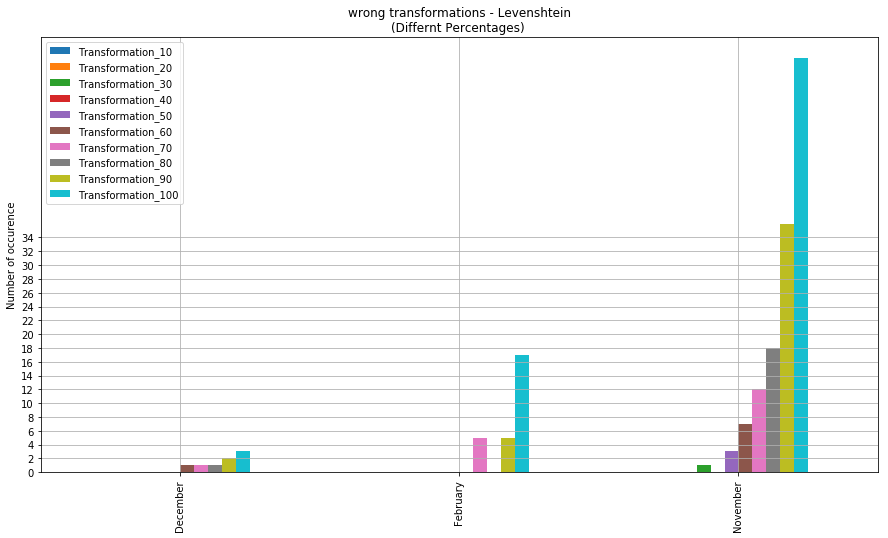

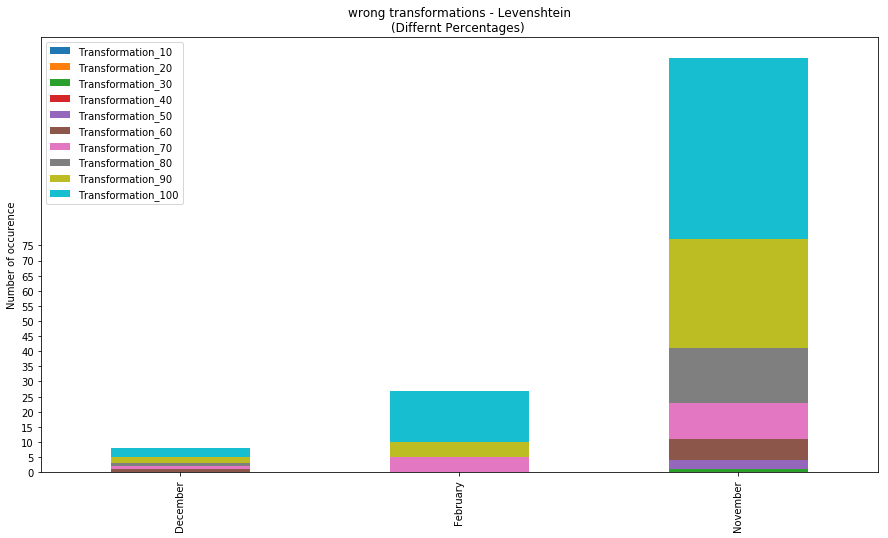

In [7]:
wrong.plot.bar(figsize=(15, 8))
plt.ylabel('Number of occurence')
plt.title('wrong transformations - Levenshtein\n(Differnt Percentages) ')
plt.yticks(range(0 , 36 ,2))
plt.grid()
wrong.plot.bar(figsize=(15, 8) ,stacked=True)
plt.yticks(range(0 , 80 ,5))
plt.ylabel('Number of occurence')
plt.title('wrong transformations - Levenshtein\n(Differnt Percentages) ')
plt.show()

In [8]:
#Creating an empty DataFrame
columns = ['Original']
Result = pd.DataFrame(index=range(0,120) , columns=columns)
Result['Noisy Form'] = ''
Result['Transfromation'] = ''
#Iterate ove the transformed columns 
per = [10 , 20 ,  40 , 50 , 60 , 70 , 80 , 90 , 100]

for p in percentage:
    c = np.where(df['STD_Months'] != df[str(p) +'_Percent_LD'])
    
    if(len(c[0])>0):
        print(str(p) + '_Percent')             
        for ind in np.nditer(c):            
            ind = int(ind)
            x = diff['Original'].iloc[ind]
            y = diff['Transformation_' + str(p)].iloc[ind]
            z = df[str(p) + '_Percent'].iloc[ind]
            Result['Original'].iloc[ind] = x
            Result['Noisy Form'].iloc[ind] = z
            Result['Transfromation'].iloc[ind] = y                   
            print('{} To {}'.format(x , y))
            print('Noisy form:' , z)
            print('\n')
        print('********') 

30_Percent
December To November
Noisy form: Dbvember


********
50_Percent
December To November
Noisy form: xazqmber


December To November
Noisy form: uguemben


December To November
Noisy form: pevsmbar


********
60_Percent
December To November
Noisy form: schemres


December To November
Noisy form: ovsemgwr


December To November
Noisy form: weveanew


December To November
Noisy form: xkyemwtr


December To November
Noisy form: lswpmmer


December To November
Noisy form: oyzemzeq


November To December
Noisy form: crcumxer


December To November
Noisy form: liqemzeh


********
70_Percent
December To November
Noisy form: epxemvlr


December To February
Noisy form: Delznaoy


December To November
Noisy form: Dzvzcfhr


November To December
Noisy form: fjcbmonr


December To November
Noisy form: wpmlmbea


December To November
Noisy form: soyimpeg


December To November
Noisy form: ichemzvq


December To November
Noisy form: bfahdxer


December To November
Noisy form: lpazvper


Decem

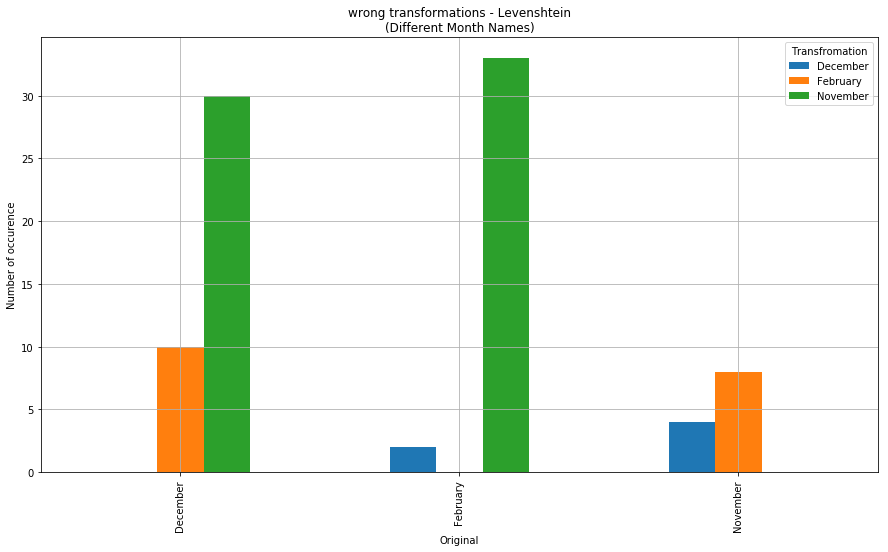

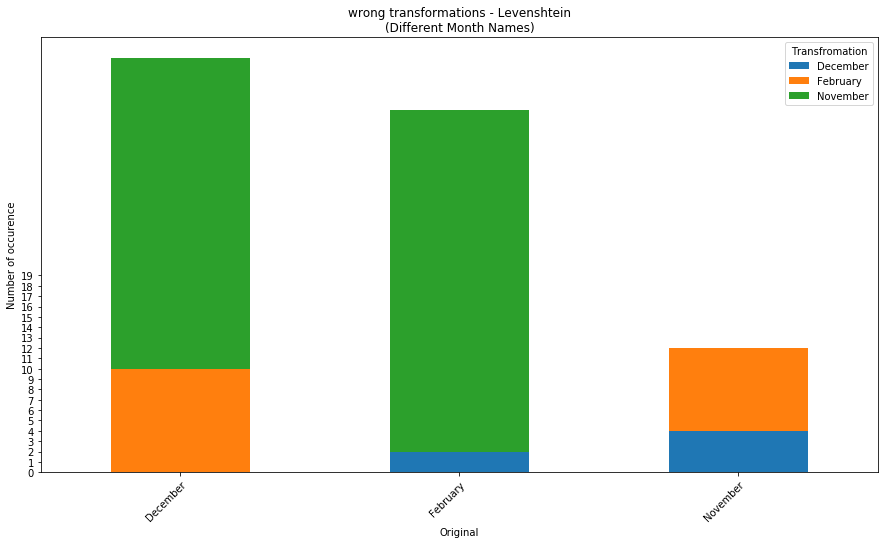

In [9]:
grouped = Result.groupby(['Original' , 'Transfromation'])
new = grouped.size().unstack()
new.plot.bar(figsize=(15, 8))
plt.ylabel('Number of occurence')
plt.title('wrong transformations - Levenshtein\n(Different Month Names)')
plt.grid()
new.plot.bar(figsize=(15, 8) ,stacked=True)
plt.xticks(rotation='45', rotation_mode='anchor', ha='right')
plt.yticks(range(0 , 20))
plt.ylabel('Number of occurence')
plt.title('wrong transformations - Levenshtein\n(Different Month Names)')
plt.show()

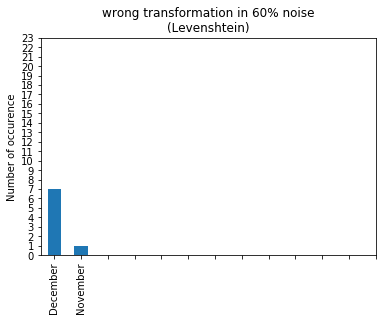

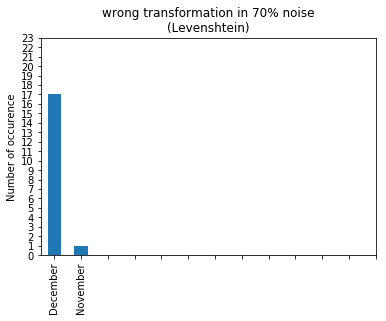

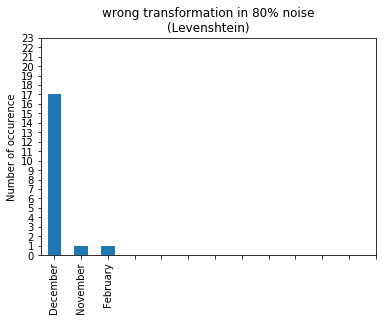

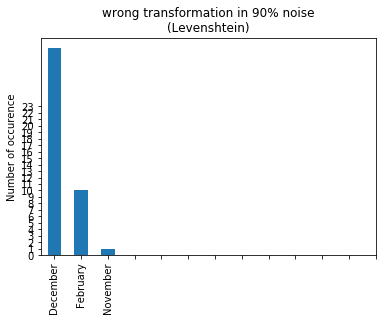

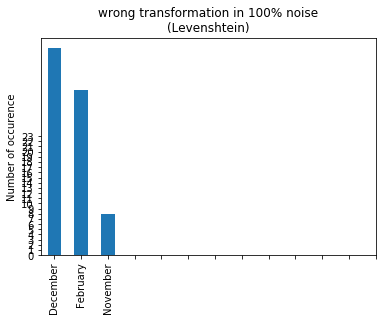

In [10]:
import numpy as np

#Iterate ove the transformed columns 
per = [60 , 70 , 80 , 90 , 100]

for p in per:
    c = np.where(df['STD_Months'] != df[str(p) +'_Percent_LD'])
    columns = ['Original' , 'Transformation']
    diff = pd.DataFrame(index=range(0,121) , columns=columns)
    diff['Transformation_' + str(p)] = ''
    diff[str(p) + '_Percent'] = ''
    for x in np.nditer(c):
        x = int(x)
        diff['Original'].iat[x] = df['STD_Months'].iat[x]
        diff[str(p) + '_Percent'].iat[x] = df[str(p) + '_Percent'].iat[x]
        diff['Transformation'].iat[x] = df[str(p) + '_Percent_LD'].iat[x]
    diff.dropna()
    wrongTransform = diff['Original'].value_counts()
    wrongTransform.plot.bar()
    plt.yticks(range(0 , 24))
    plt.ylabel('Number of occurence')
    plt.title('wrong transformation in {}% noise\n(Levenshtein)'.format(p))
    plt.xticks(range(0,13))
    plt.show()

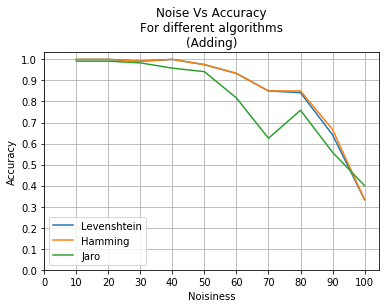

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
x = [10,20,30,40,50,60,70,80,90,100]
yLD=LdAccuracy
yHamming=[1.0, 1.0, 0.9916666666666667, 1.0, 0.97499999999999998, 0.93333333333333335, 0.84999999999999998, 0.84999999999999998, 0.66666666666666663, 0.33333333333333331]
yJaro=[0.9916666666666667, 0.9916666666666667, 0.98333333333333328, 0.95833333333333337, 0.94166666666666665, 0.81666666666666665, 0.625, 0.7583333333333333, 0.55833333333333335, 0.40000000000000002]
plt.plot(x,yLD , label = 'Levenshtein')
plt.plot(x,yHamming , label = 'Hamming')
plt.plot(x,yJaro , label = 'Jaro')
#Add title and label
plt.xlabel('Noisiness')
plt.ylabel('Accuracy')
plt.title('Noise Vs Accuracy\nFor different algorithms\n(Adding)')
plt.xticks(np.arange(0 , 110 , 10))
plt.yticks(np.arange(0 , 1.1 , 0.1))
plt.legend()
plt.grid()
plt.show()